In [2]:
from tensorflow import keras
(train_input,train_target), (test_input,test_target) =\
    keras.datasets.fashion_mnist.load_data()

In [5]:
train_scaled = train_input.reshape(-1,28,28,1) / 255.0
test_scaled = test_input.reshape(-1,28,28,1) / 255.0

In [6]:
print(train_scaled.shape)

(60000, 28, 28, 1)


In [7]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled,train_target, test_size=0.2, random_state =42
)

In [8]:
print(train_scaled.shape,val_scaled.shape,test_scaled.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)


In [9]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))


In [10]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 100)               627300    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [15]:
history = model.fit(train_scaled,train_target, epochs= 150, validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4677 - accuracy: 0.8347 - val_loss: 0.3163 - val_accuracy: 0.8848
Epoch 2/150
  28/1500 [..............................] - ETA: 8s - loss: 0.3036 - accuracy: 0.8839

c:\Users\user\Desktop\py\vpyenv3.8\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3184 - accuracy: 0.8842 - val_loss: 0.2795 - val_accuracy: 0.8945
Epoch 3/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2756 - accuracy: 0.9001 - val_loss: 0.2553 - val_accuracy: 0.9047
Epoch 4/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2471 - accuracy: 0.9087 - val_loss: 0.2580 - val_accuracy: 0.9054
Epoch 5/150
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2243 - accuracy: 0.9177 - val_loss: 0.2517 - val_accuracy: 0.9097
Epoch 6/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2059 - accuracy: 0.9227 - val_loss: 0.2414 - val_accuracy: 0.9133
Epoch 7/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1912 - accuracy: 0.9285 - val_loss: 0.2477 - val_accuracy: 0.9133
Epoch 8/150
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1736 - accuracy: 0.9338 - val_loss: 0.2317 - val_accuracy: 0.

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


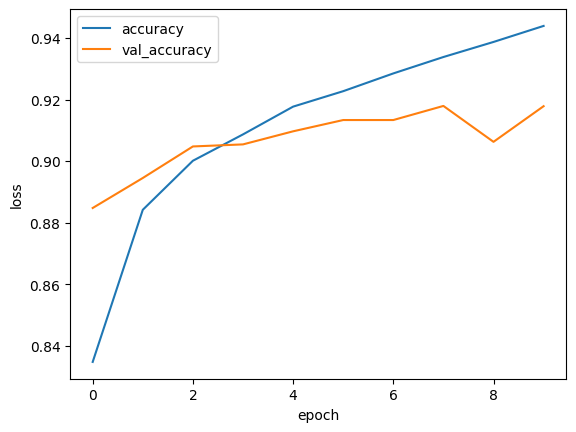

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label= 'accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

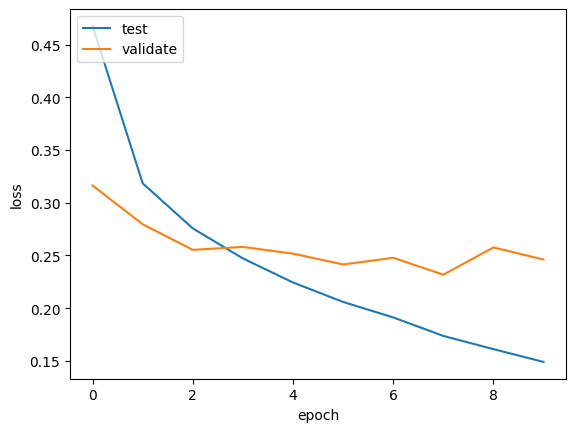

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],label= 'test')
plt.plot(history.history['val_loss'],label='validate')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='upper left')
plt.show()

In [19]:
model.evaluate(test_scaled,test_target)

313/313 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.9110


[0.26105797290802, 0.9110000133514404]